# 1. 📈 Sélection du Problème - Analyse et Prédiction de données deonnées boursières à l'aide d'algorithmes Machine Learning

> La prévision boursière constitue un domaine de recherche important dans le domaine du Machine Learning. Les algorithmes d'apprentissage machine learning tels que la régression, le classificateur et la machine à vecteurs de support (SVM) peuvent s'avérer d'une aide utile pour prédire le marché boursier. Ce travail pratique présente une mise en œuvre de l'analyse et de la prédiction de données de titres boursiers à l'aide d'algorithme de Machine Learning. 

Il se base sur la lecture des articles suivants :
> 1. https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/
> 2. https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
---

# 2. 📤 Import des Libraries et analyses des 💾 Données

> Nous allons utiliser entre autres les librairies yahoo finance et pandas_datareader pour pemettre d'effectuer le chargement des données boursières historiques pour les titres sur lesquels nous souhaitons pouvoir analyser et effectuer une prédiction du cours du prix de clôture pour le titre sélectionné.

> Les données qui seront collectées pour l'anallyse sont les données de séries temporelles de 6 titres de bourses selectionnés du Nasdaq ("APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "NVIDIA") sur une profondeur d'une année.

Les données contiennent les colonnes suivantes :
> * '`Date`': La date correspondant aux données du titre.
> * '`Open`': Le prix à l'ouverture du titre à la date donnée.
> * '`High`': Le prix le plus haut du titre à la date donnée.
> * '`Low`': Le prix le bas du titre à la date donnée.
> * '`Close`': Le prix à la clôture du titre à la date donnée.
> * '`Adj. Close`': Prix auquel la maison a été vendue.
> * '`Company Name`': Le nom du titre.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NVDA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, NVDA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "NVIDIA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-07-03,121.660004,128.279999,121.360001,128.279999,128.279999,215749000,NVIDIA
2024-07-05,127.379997,128.850006,125.680000,125.830002,125.830002,214176700,NVIDIA
2024-07-08,127.489998,130.770004,127.040001,128.199997,128.199997,237677300,NVIDIA
2024-07-09,130.350006,133.820007,128.649994,131.380005,131.380005,285366600,NVIDIA
2024-07-10,134.029999,135.100006,132.419998,134.910004,134.910004,248978600,NVIDIA
2024-07-11,135.750000,136.149994,127.050003,127.400002,127.400002,374782700,NVIDIA
2024-07-12,128.259995,131.919998,127.220001,129.240005,129.240005,252103100,NVIDIA
2024-07-15,130.559998,131.389999,127.180000,128.440002,128.440002,208326200,NVIDIA
2024-07-16,128.440002,129.039993,124.580002,126.360001,126.360001,214057700,NVIDIA


In [2]:
# Summary Stats AAPL
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,185.829091,187.467668,184.337075,185.937767,185.506569,6.038717e+07
std,14.101692,14.308386,13.925393,14.188321,14.286602,2.481958e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,9.842051e+06
25%,175.309998,177.080002,173.740005,175.460007,174.802902,4.731740e+07
50%,183.919998,185.149994,182.110001,184.119995,183.610962,5.379050e+07
75%,192.490005,194.320007,191.419998,192.529999,192.024185,6.613340e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


In [3]:
# Summary Stats NVDA
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,69.830925,71.027818,68.495771,69.846849,69.838539,4.622813e+08
std,28.325887,28.907554,27.625012,28.291792,28.294278,1.556952e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,5.375951e+07
25%,46.099998,46.867001,45.262001,46.095001,46.085003,3.700670e+08
50%,55.018002,56.471001,54.740002,56.053001,56.045769,4.333300e+08
75%,89.483002,90.646004,87.084999,88.963997,88.956688,5.284020e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.156044e+09


In [4]:
# General info APPL
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-07-17 to 2024-07-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
# General info NVDA
NVDA.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-07-17 to 2024-07-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


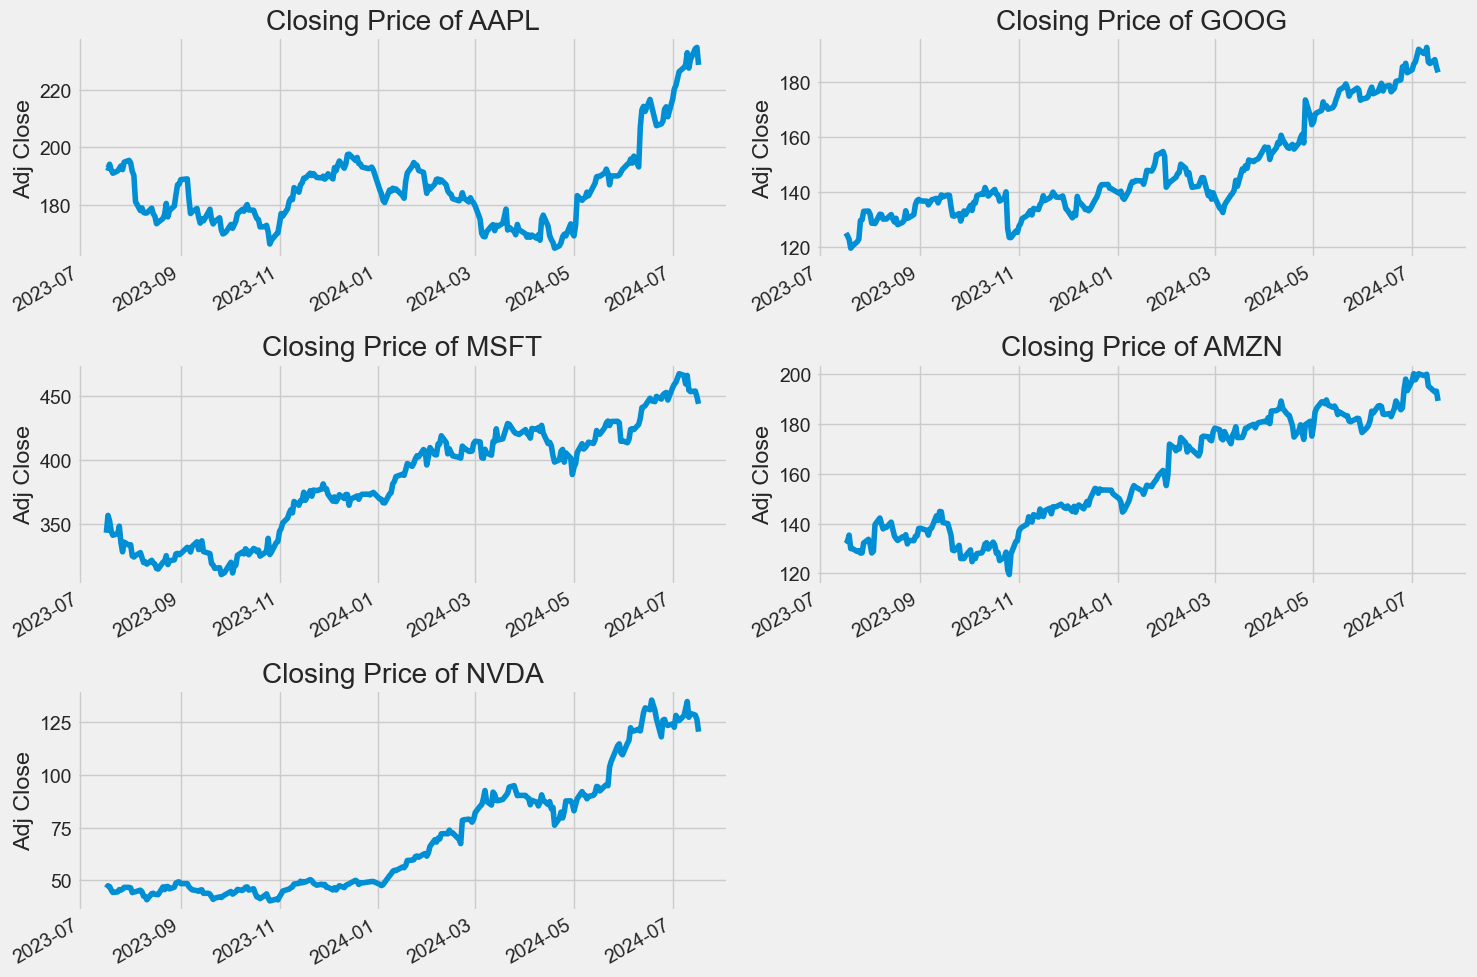

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

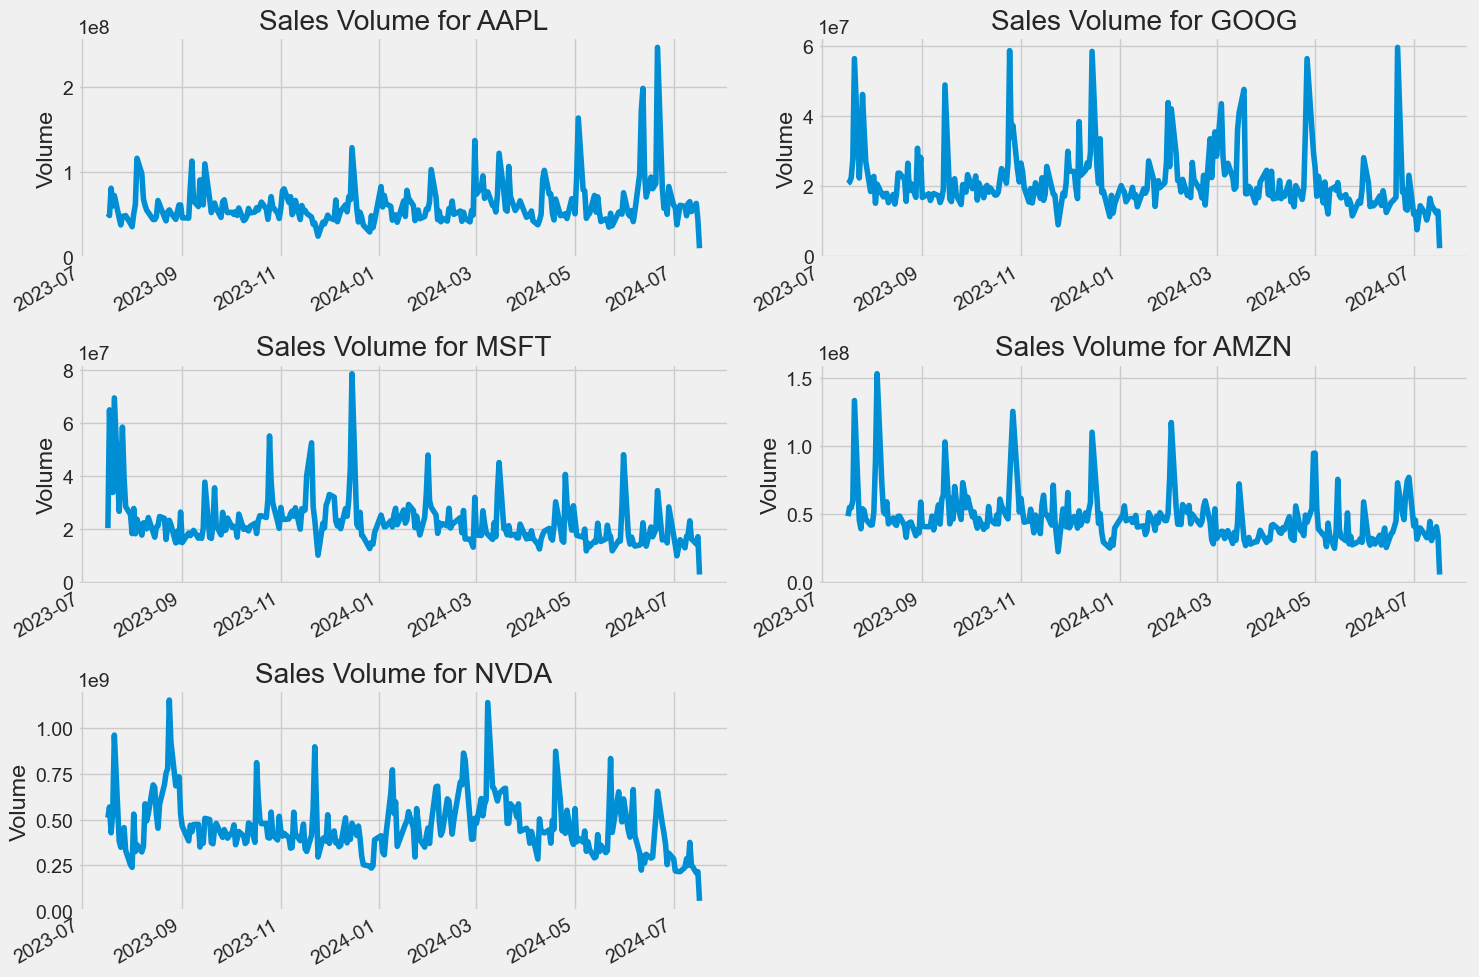

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

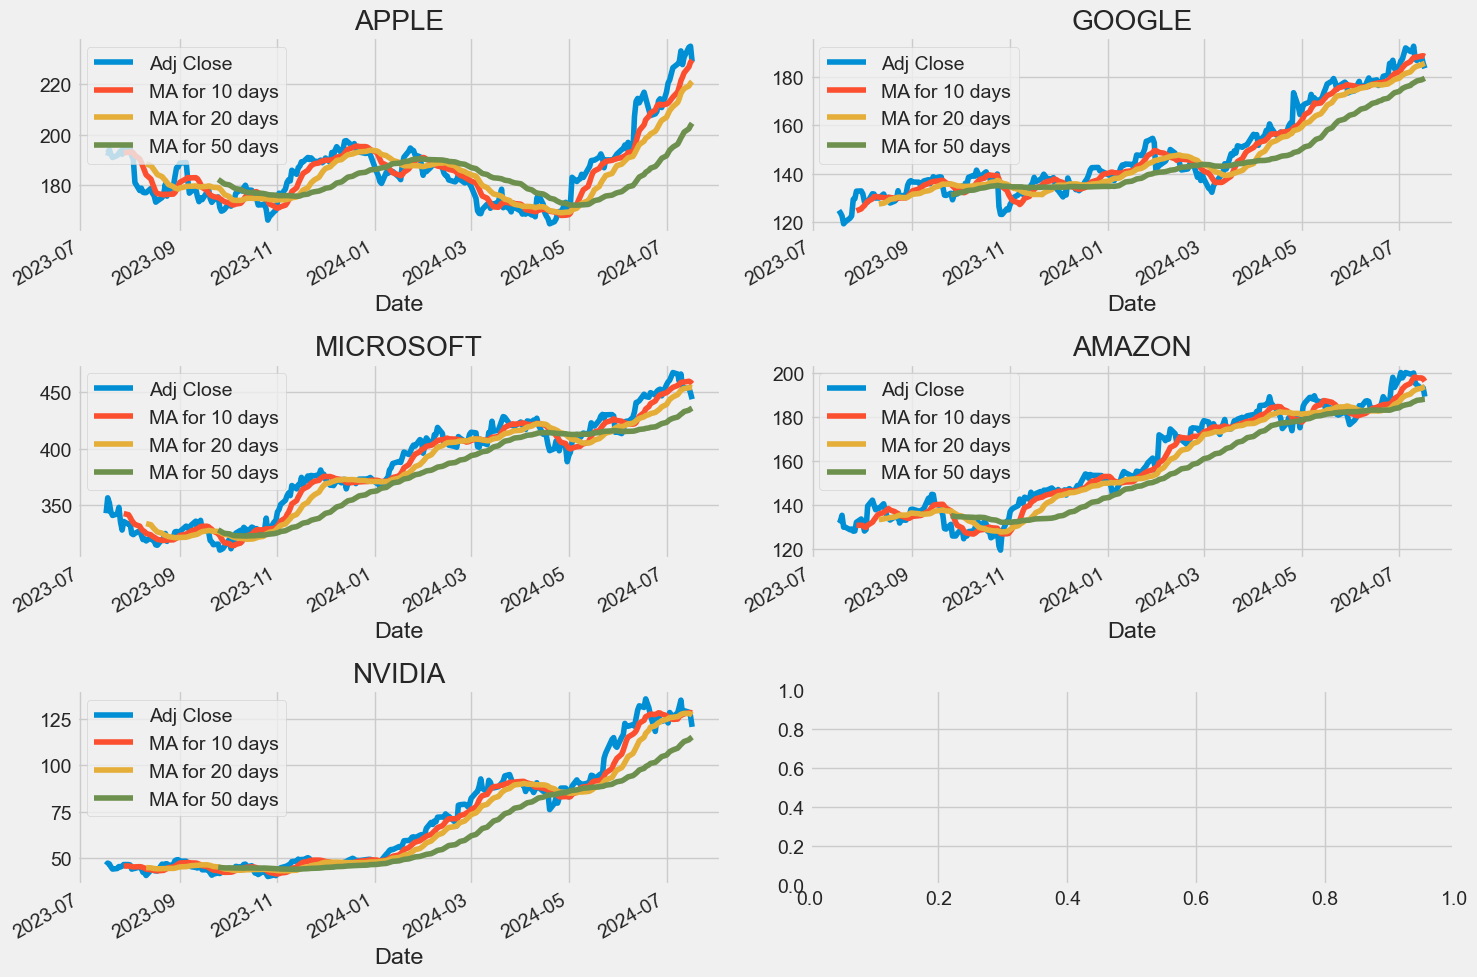

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('NVIDIA')

fig.tight_layout()

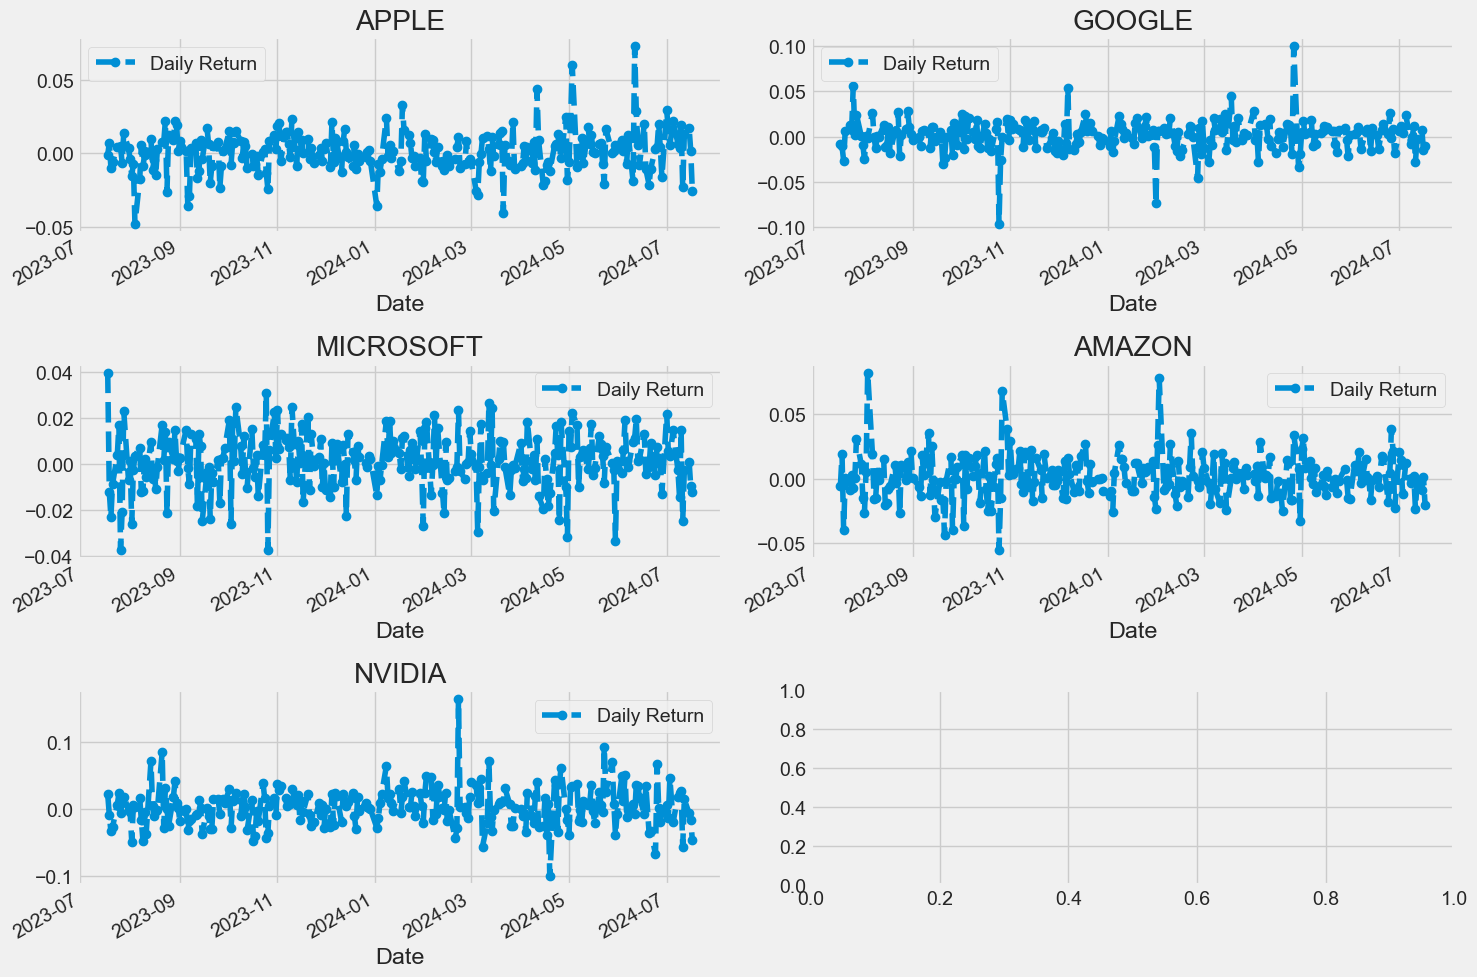

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

NVDA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('NVIDIA')

fig.tight_layout()

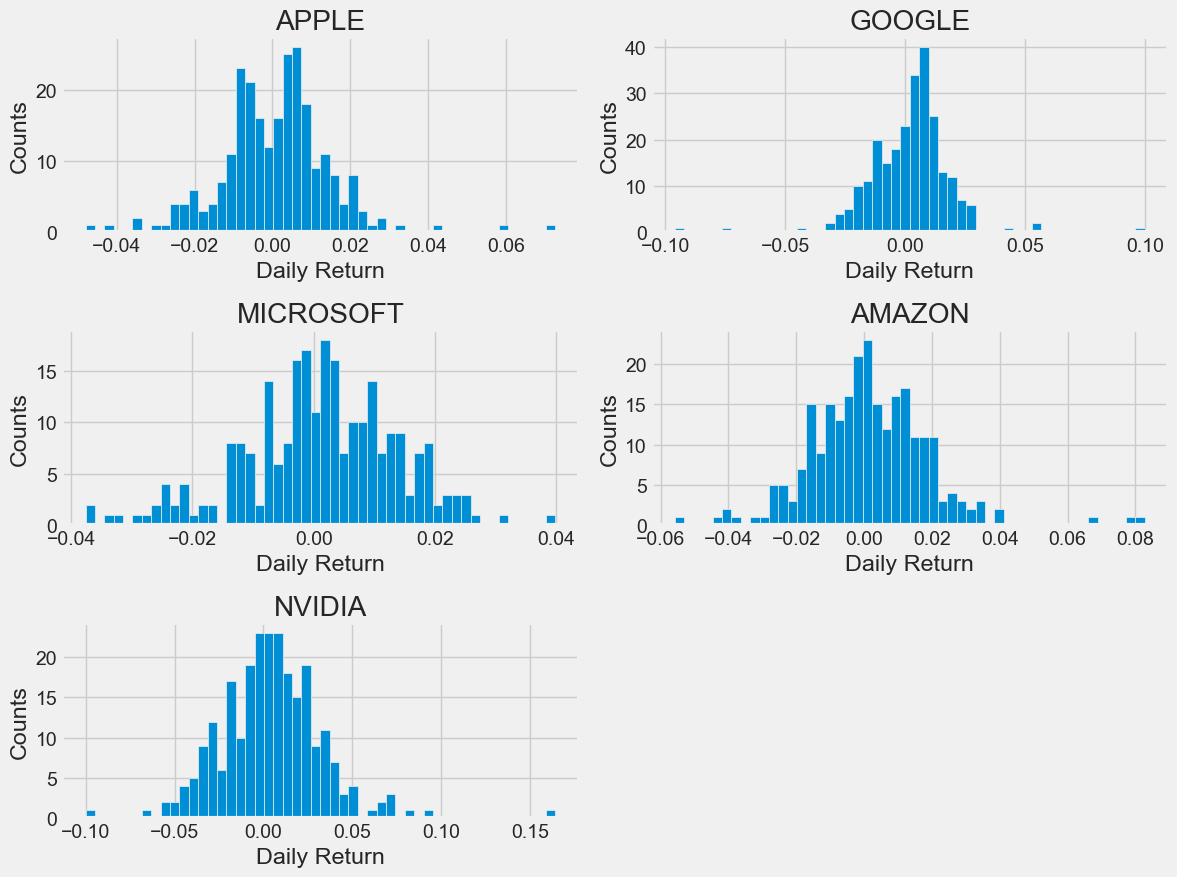

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NVDA
Date,,,,,
2023-07-17,NaN,NaN,NaN,NaN,NaN
2023-07-18,-0.001340,-0.005466,-0.007836,0.039800,0.022234
2023-07-19,0.007072,0.019047,-0.010477,-0.012267,-0.008780
2023-07-20,-0.010097,-0.039894,-0.026470,-0.023121,-0.033073
2023-07-21,-0.006162,0.000308,0.006526,-0.008937,-0.026604


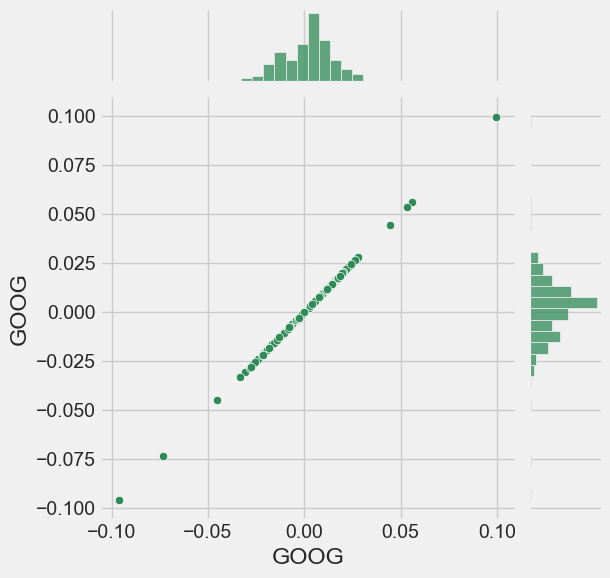

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

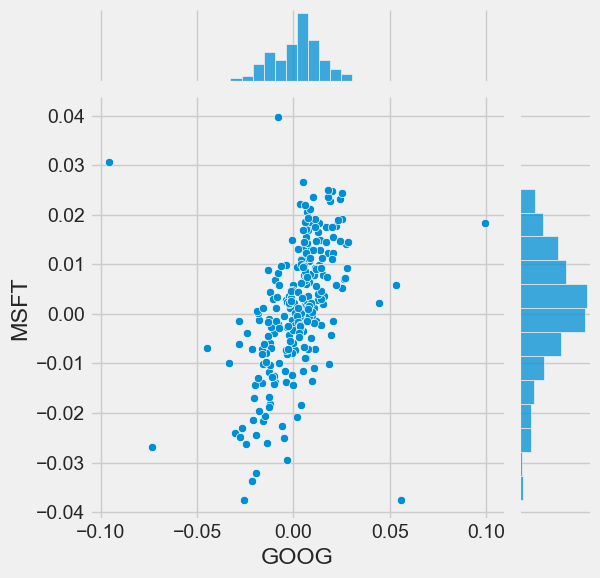

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

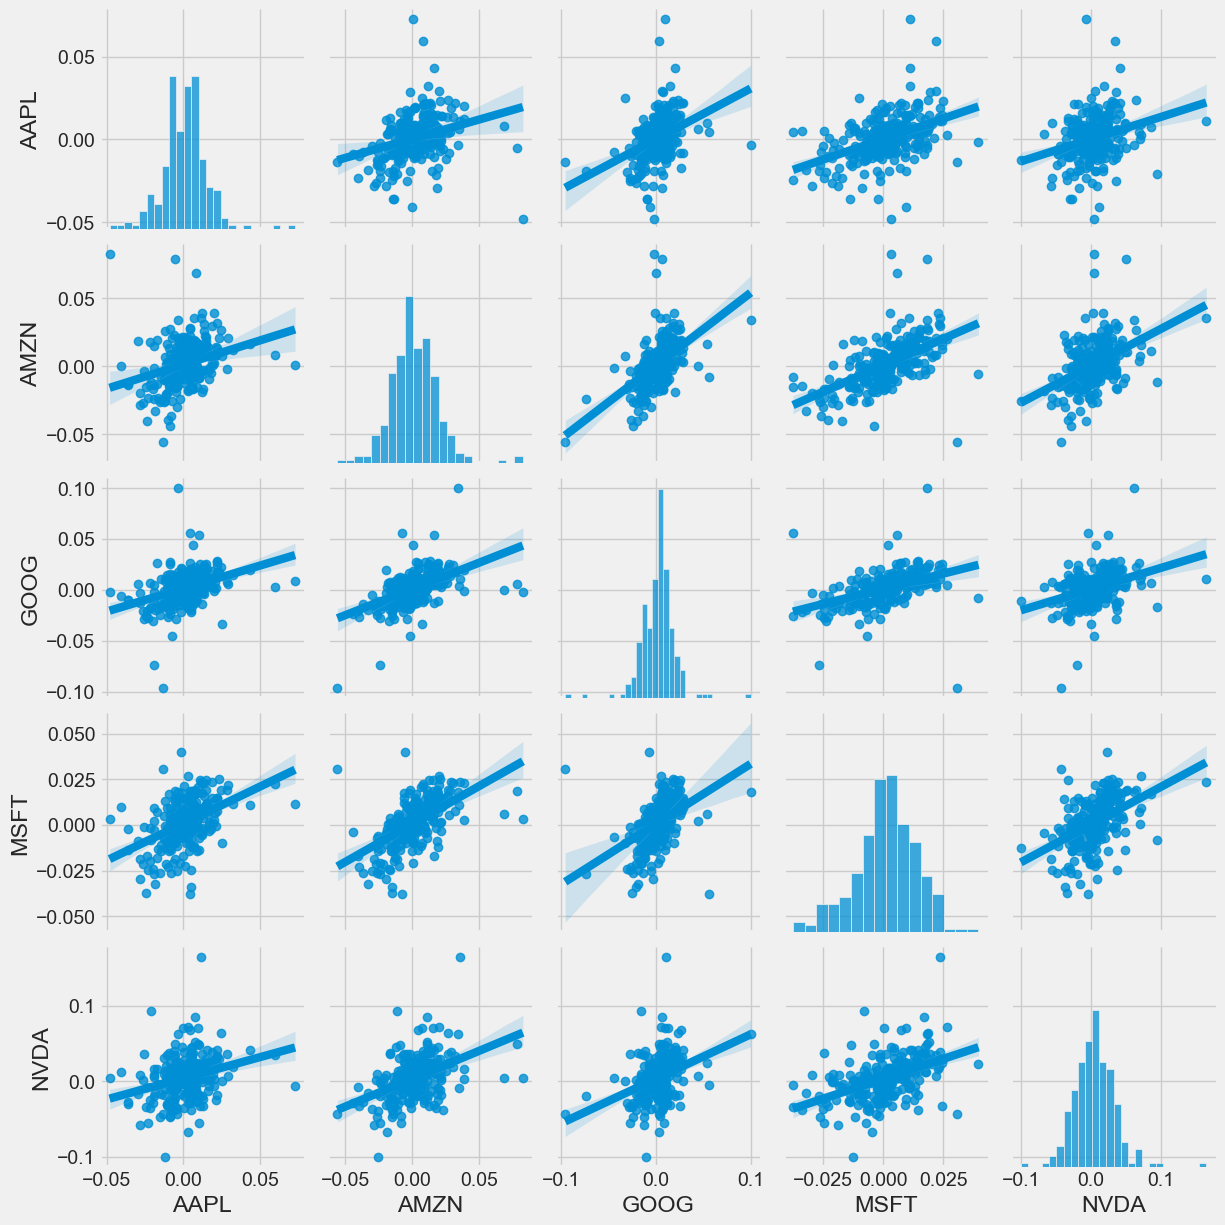

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

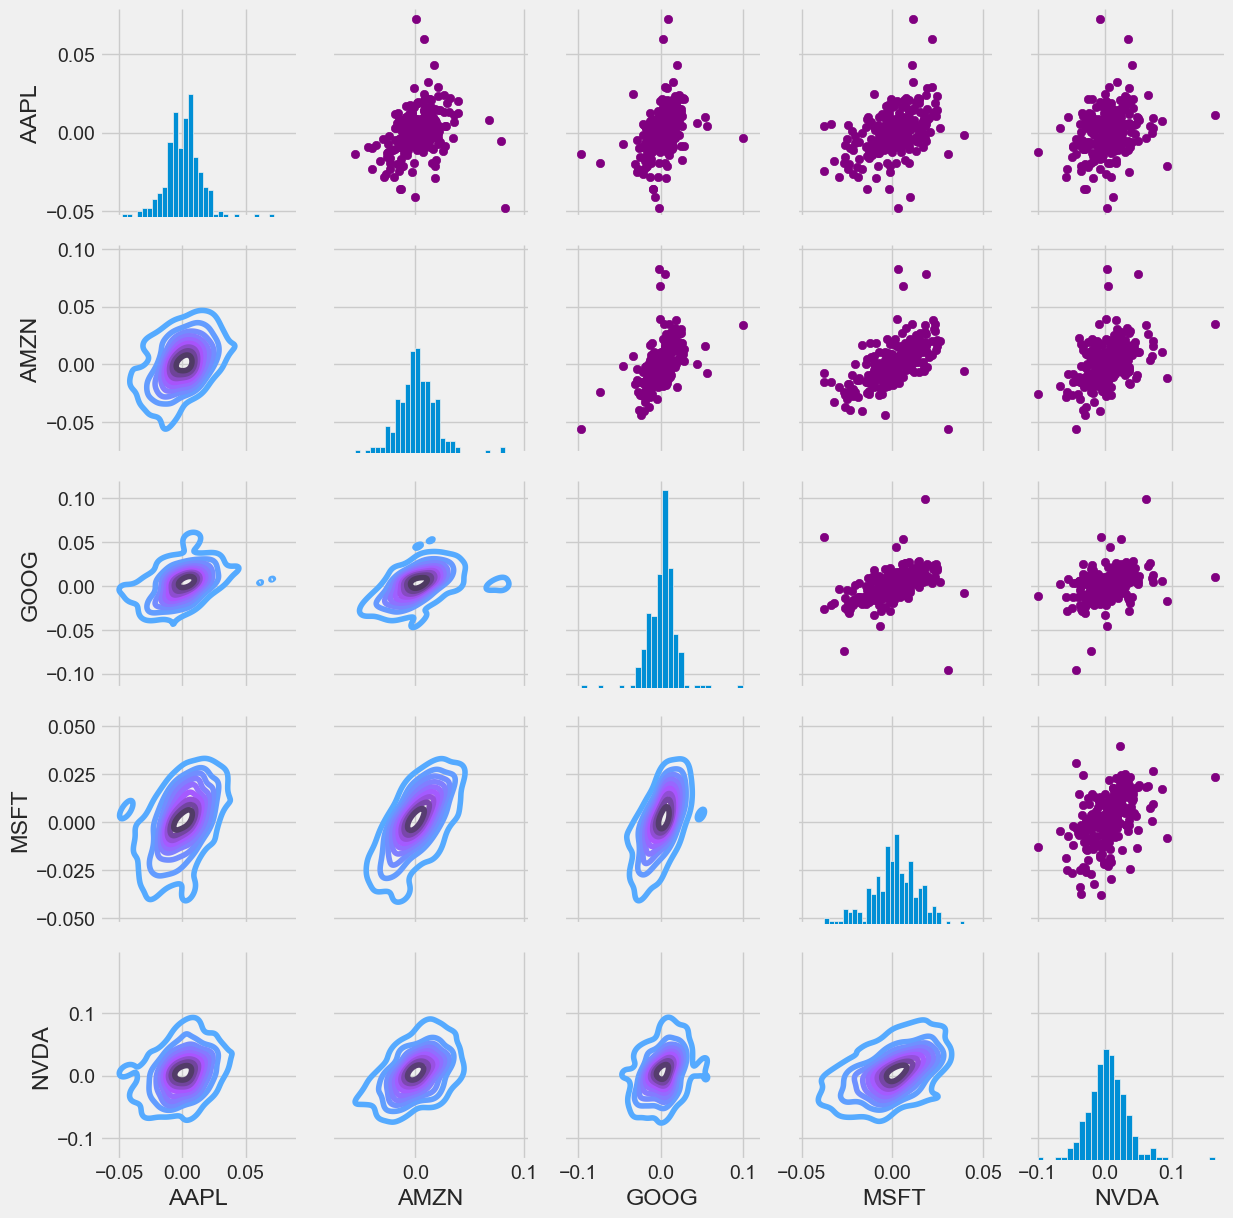

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

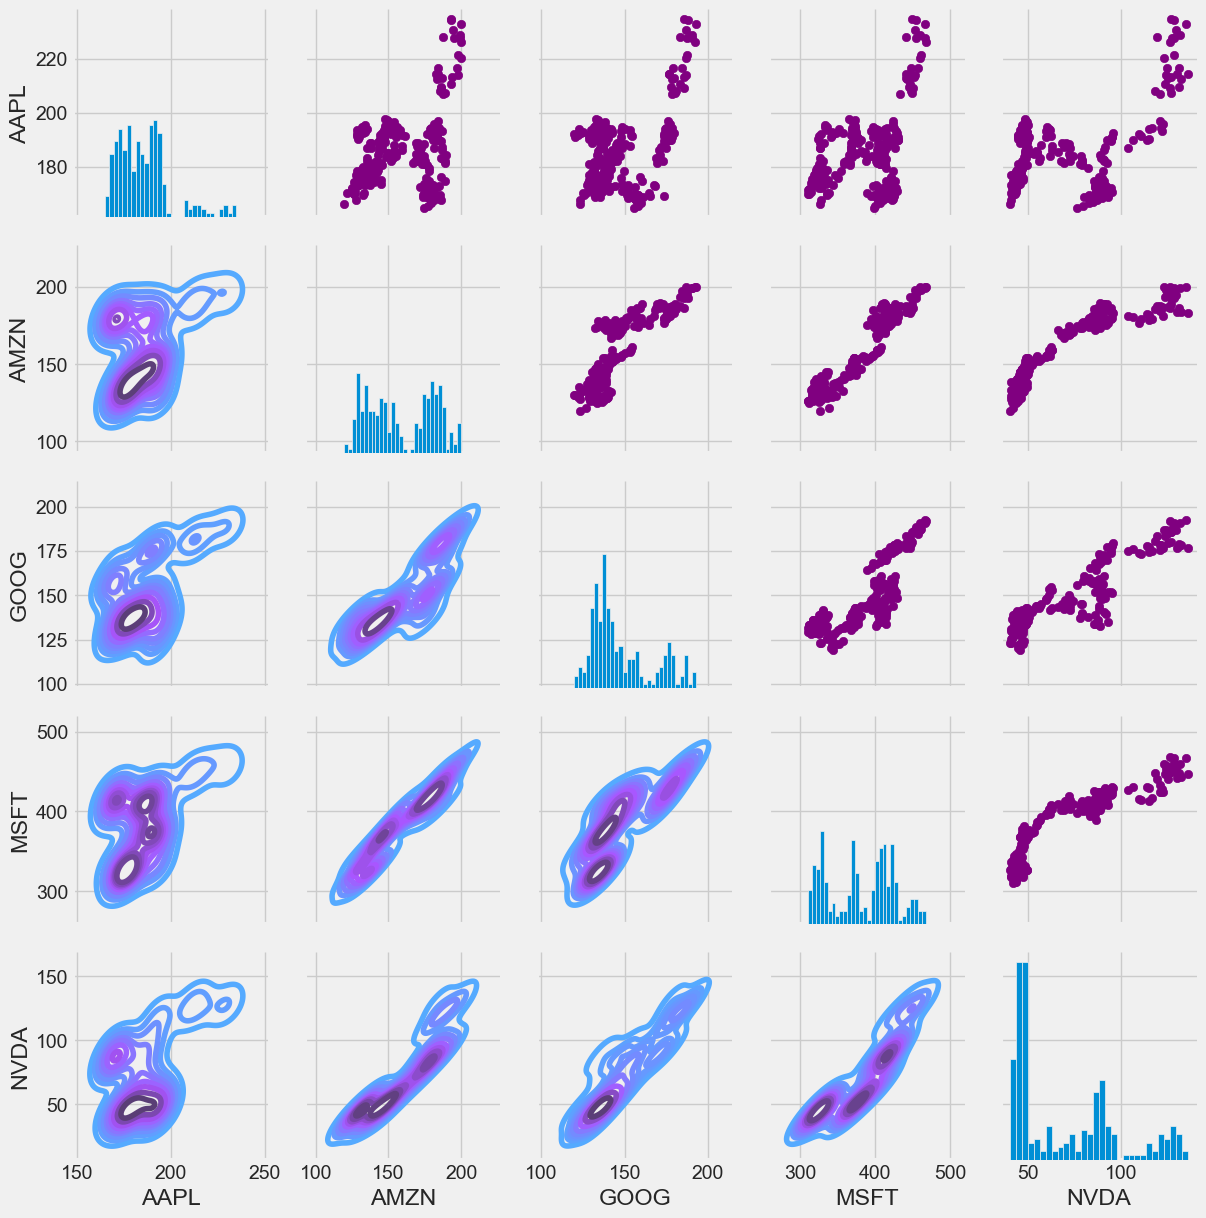

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

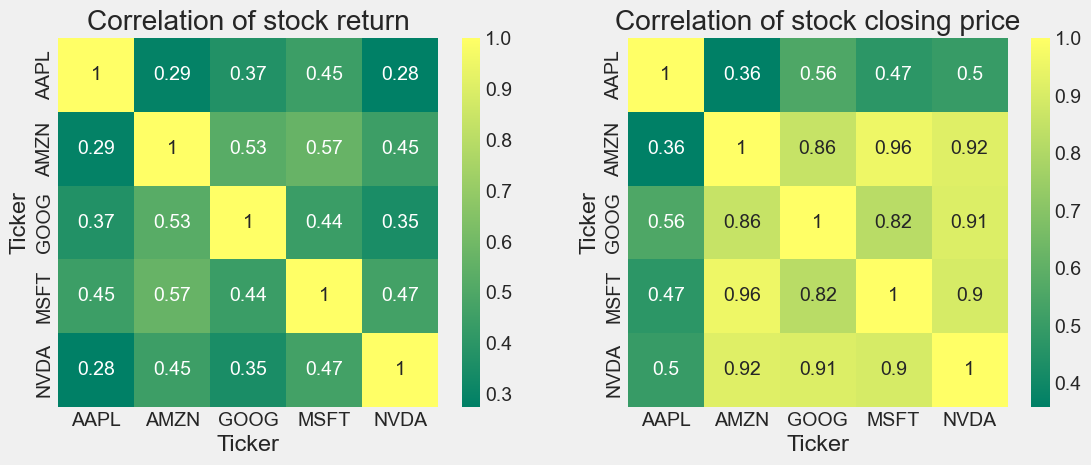

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

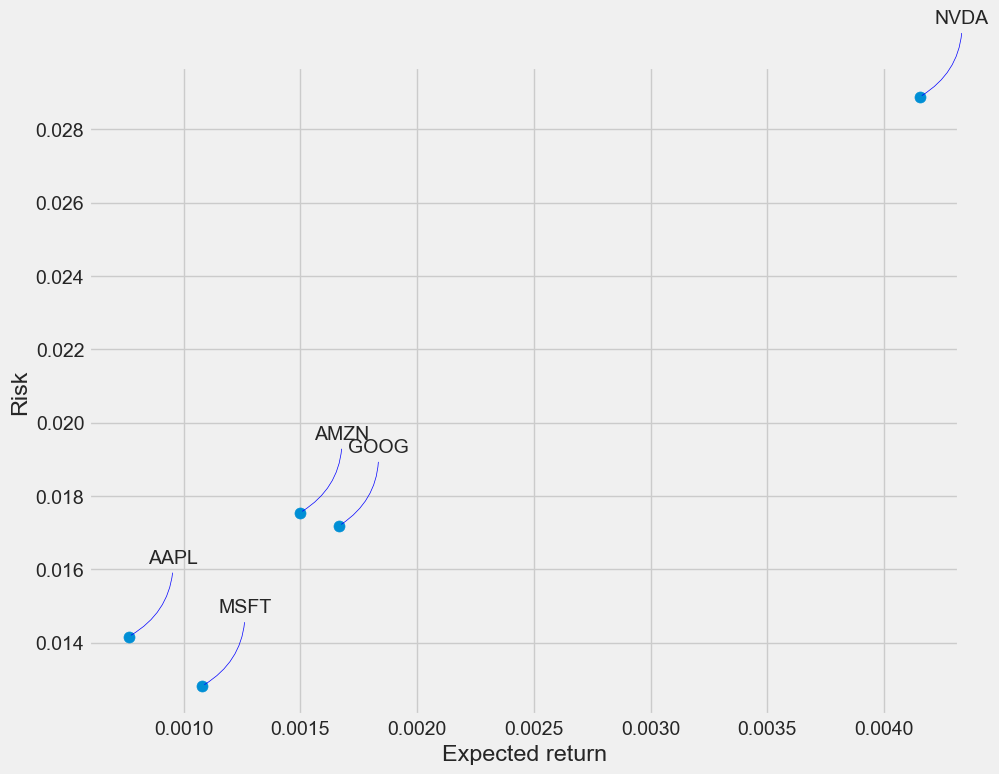

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('NVDA', start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,0.357500,0.360000,0.350250,0.351000,0.321947,468044000
2012-01-04,0.351250,0.356500,0.348000,0.355000,0.325616,347372000
2012-01-05,0.353250,0.369500,0.351750,0.367750,0.337310,563548000
2012-01-06,0.367500,0.367750,0.359250,0.363500,0.333412,533252000
2012-01-09,0.363750,0.370500,0.361000,0.363500,0.333412,508244000
...,...,...,...,...,...,...
2024-07-11,135.750000,136.149994,127.050003,127.400002,127.400002,374782700
2024-07-12,128.259995,131.919998,127.220001,129.240005,129.240005,252103100
2024-07-15,130.559998,131.389999,127.180000,128.440002,128.440002,208326200


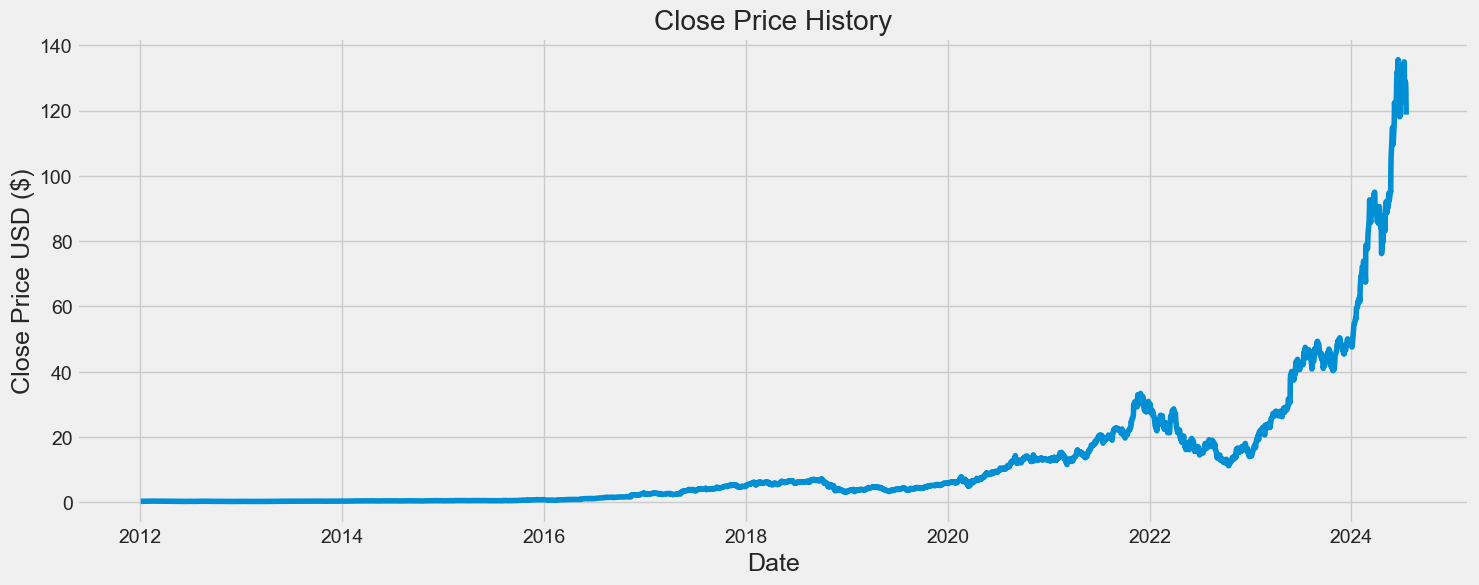

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2997

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.91516770e-04],
       [5.21081525e-04],
       [6.15319689e-04],
       ...,
       [9.47226631e-01],
       [9.31852862e-01],
       [8.75605607e-01]])

In [23]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00049152, 0.00052108, 0.00061532, 0.00058391, 0.00058391,
       0.00057282, 0.00051923, 0.0005026 , 0.00043423, 0.00039543,
       0.00048043, 0.0005488 , 0.00052478, 0.00059684, 0.00065782,
       0.00064119, 0.00061532, 0.00065228, 0.00063195, 0.00062641,
       0.00065597, 0.00075945, 0.00082043, 0.00079825, 0.00080564,
       0.00091097, 0.00090912, 0.00083521, 0.0008814 , 0.00089803,
       0.0008851 , 0.00093684, 0.00082597, 0.00084075, 0.00082043,
       0.00083706, 0.00081488, 0.00075575, 0.00072988, 0.00069662,
       0.0007151 , 0.00073912, 0.00064304, 0.00061717, 0.0006338 ,
       0.00064304, 0.00063565, 0.00059315, 0.0006301 , 0.00055249,
       0.0005913 , 0.00059499, 0.00060239, 0.00055804, 0.00056912,
       0.00056543, 0.00058575, 0.00061717, 0.00063565, 0.00069847])]
[0.0007114057475320814]

[array([0.00049152, 0.00052108, 0.00061532, 0.00058391, 0.00058391,
       0.00057282, 0.00051923, 0.0005026 , 0.00043423, 0.00039543,
       0.00048043, 0.0005488 , 0.

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2937/2937 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - loss: 3.2181e-04


In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


9.297033893292216

/var/folders/q1/yd35jmgd03zfvl8w0h_h2g_80000gn/T/ipykernel_50365/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


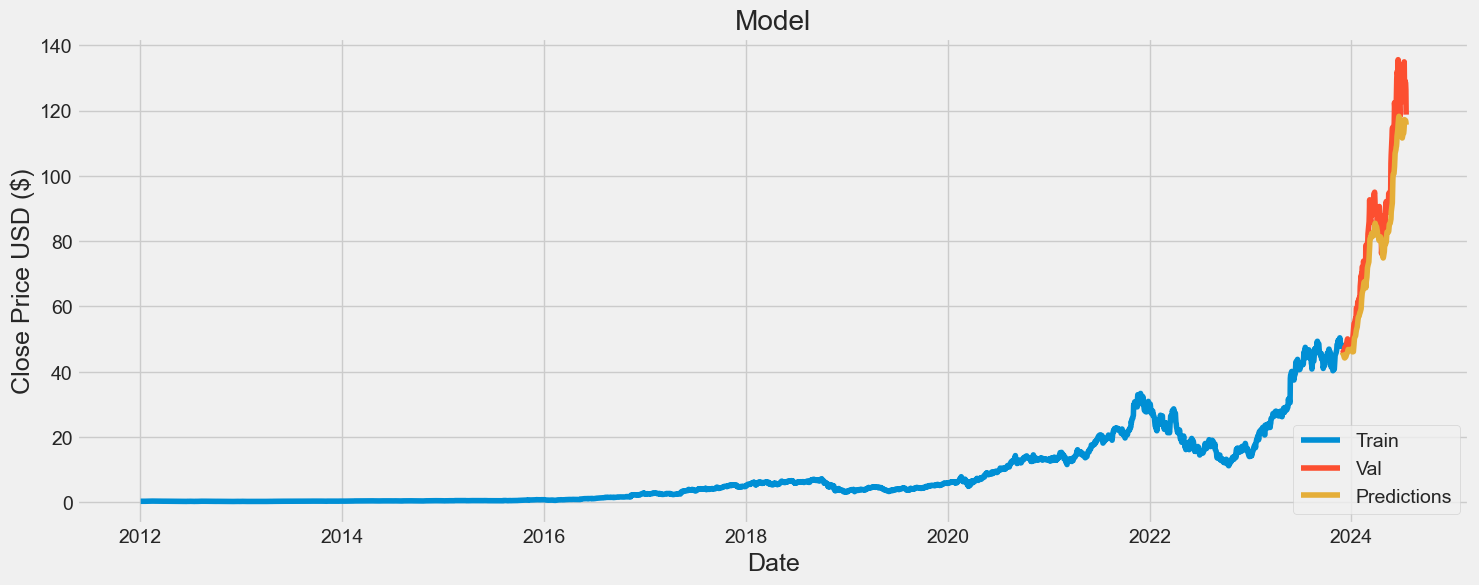

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid